In [2]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tabulate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from copy import deepcopy
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras import layers # type: ignore
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.losses import BinaryCrossentropy # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.metrics import AUC # type: ignore
from tensorflow.keras.callbacks import ModelCheckpoint # type: ignore
from tensorflow.keras.models import load_model # type: ignore
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import RMSprop # type: ignore
from tensorflow.keras.models import load_model # type: ignore
from sklearn.metrics import classification_report
import customtkinter
import tkinter
from tkinter import messagebox
import tkinter.font

label
0    27496
1     5818
Name: count, dtype: int64
label
0    19821
1    12748
Name: count, dtype: int64


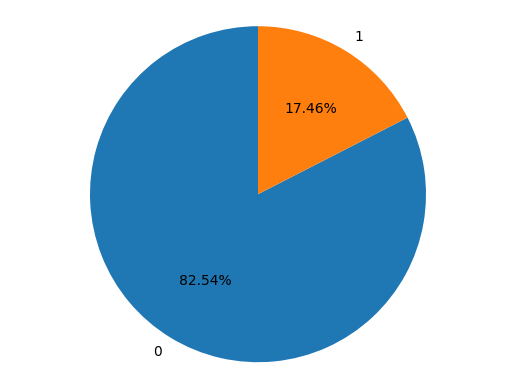

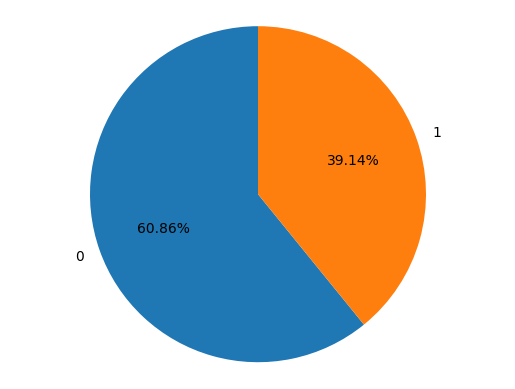

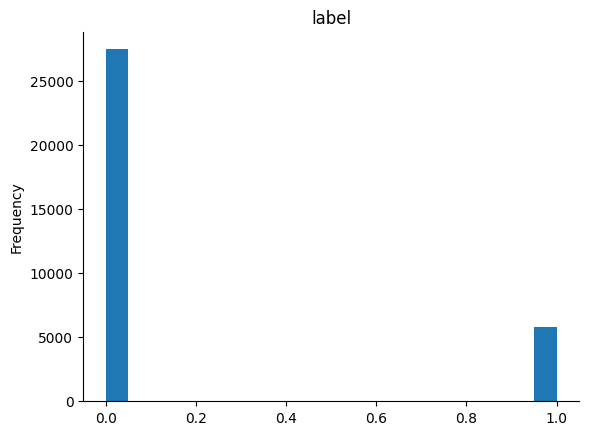

In [5]:
train_df = pd.read_csv(r"train_E6oV3lV1.csv")

train_df1=pd.read_csv(r"HateSpeechDataset.csv")

print(train_df['label'].value_counts())
print(train_df1['label'].value_counts())

def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    labels = t_df.value_counts().index.values
    sizes = Lst
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=False, startangle=90)
    ax1.axis('equal')
    plt.show()
createPieChartFor(train_df.label)
createPieChartFor(train_df1.label)

train_df['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)



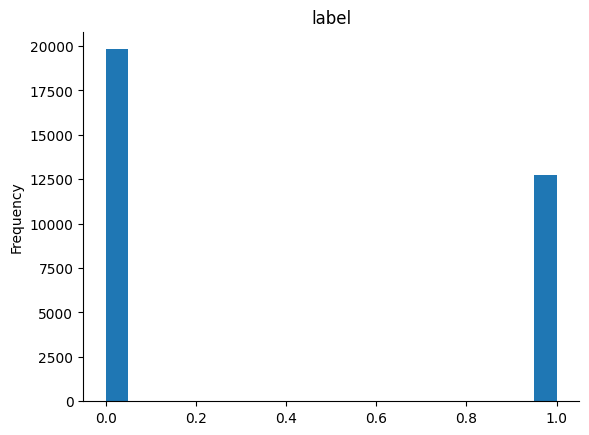

In [6]:
train_df1['label'].plot(kind='hist', bins=20, title='label')
plt.gca().spines[['top', 'right',]].set_visible(False)

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


          id  label                                              tweet  \
0          1      0   @user when a father is dysfunctional and is s...   
1          2      0  @user @user thanks for #lyft credit i can't us...   
2          3      0                                bihday your majesty   
3          4      0  #model   i love u take with u all the time in ...   
4          5      0             factsguide: society now    #motivation   
...      ...    ...                                                ...   
33309  33310      1  indians are just not as clean as british peopl...   
33310  33311      1  the french are just not as clean as british pe...   
33311  33312      1  italians are just not as clean as british peop...   
33312  33313      1                         foreigners are uncivilized   
33313  33314      1  foreigners are just not civilized like whateve...   

                                             clean_tweet  
0      user father dysfunctional selfish drag kid dy

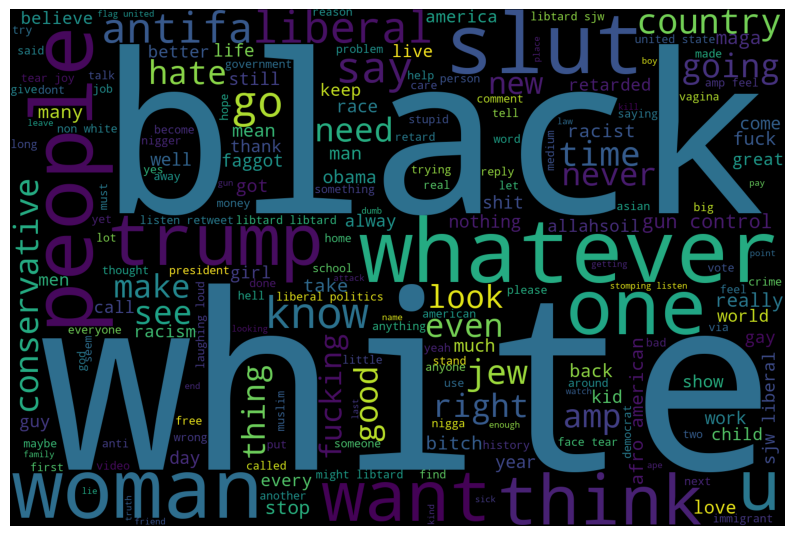

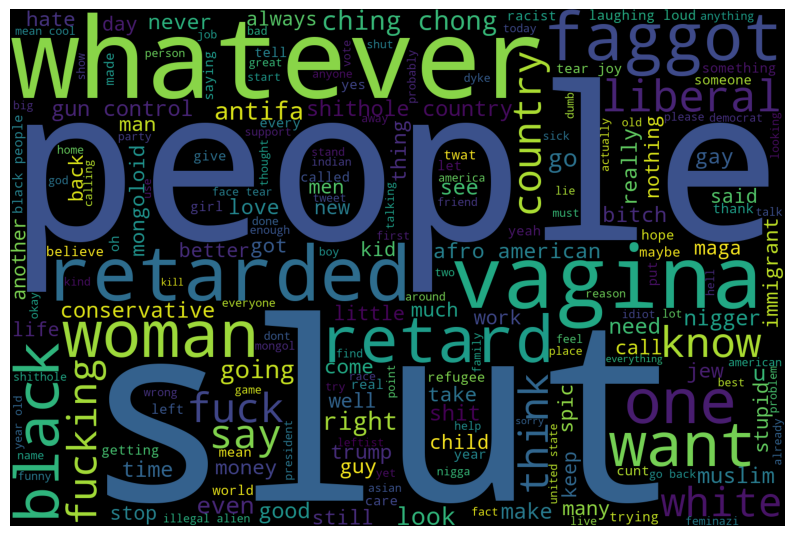

In [7]:
nltk.download('stopwords')
lemmatizer = WordNetLemmatizer()
eng_stops = set(stopwords.words("english"))
def process_message(review_text):
    # remove all the special characters
    new_review_text = re.sub("[^a-zA-Z]", " ",review_text)
    # convert all letters to lower case
    words = new_review_text.lower().split()
    # remove stop words
    words = [w for w in words if not w in eng_stops]
    # lemmatizer
    words = [lemmatizer.lemmatize(word) for word in words]
    # join all words back to text
    return (" ".join(words))
train_df['clean_tweet']=train_df['tweet'].apply(lambda x: process_message(x))
train_df1['clean_tweet']=train_df1['tweet'].apply(lambda x: process_message(x))
print(train_df)
print(train_df1)
def createWrdCloudForSentiment(sentiment):
    sentiment_num = 1 if sentiment== 'Hate' else 0
    temp_df = train_df[train_df.label==sentiment_num]
    temp_df2=train_df1[train_df1.label==sentiment_num]
    words = " ".join(temp_df.clean_tweet)
    words2 = " ".join(temp_df2.clean_tweet)
    cleaned_words = " ".join([w for w in words.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='user'
                                    and w!='RT'])
    cleaned_words2 = " ".join([w for w in words2.split()
                                  if 'http' not in w
                                    and not w.startswith('@')
                                    and w!='user'
                                    and w!='RT'])

    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(cleaned_words)
    wrdcld2 = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(cleaned_words2)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld2)
    plt.axis('off')
    plt.show
createWrdCloudForSentiment("Hate")

In [8]:
import tabulate as table


In [9]:
words = dict()

def add_to_dict(d, filename):
  with open(filename, 'r',encoding="UTF=8") as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue

add_to_dict(words,r"glove.twitter.27B.100d.txt")
words

len(words)


nltk.download('wordnet')

tokenizer = nltk.RegexpTokenizer(r"\w+")

tokenizer.tokenize('@user when a father is dysfunctional and is')


lemmatizer = WordNetLemmatizer()

lemmatizer.lemmatize('feet')

def message_to_token_list(s):
  tokens = tokenizer.tokenize(s)
  lowercased_tokens = [t.lower() for t in tokens]
  lemmatized_tokens = [lemmatizer.lemmatize(t) for t in lowercased_tokens]
  useful_tokens = [t for t in lemmatized_tokens if t in words]

  return useful_tokens

message_to_token_list('@user feet a fathers is dysfunctional and is')

def message_to_word_vectors(message, word_dict=words):
  processed_list_of_tokens = message_to_token_list(message)

  vectors = []

  for token in processed_list_of_tokens:
    if token not in word_dict:
      continue

    token_vector = word_dict[token]
    vectors.append(token_vector)

  return np.array(vectors, dtype=float)

message_to_word_vectors('@user when a father is dysfunctional and is').shape

train_df = train_df.sample(frac=1, random_state=1)
train_df.reset_index(drop=True, inplace=True)
train_df1 = train_df.sample(frac=1, random_state=1)
train_df1.reset_index(drop=True, inplace=True)

split_index_1 = int(len(train_df) * 0.7)
split_index_2 = int(len(train_df) * 0.85)
split2_index_1 = int(len(train_df1) * 0.7)
split2_index_2 = int(len(train_df1) * 0.85)

train_df, val_df, test_df = train_df[:split_index_1], train_df[split_index_1:split_index_2], train_df[split_index_2:]
train_df1, val2_df, test2_df = train_df1[:split2_index_1], train_df1[split2_index_1:split2_index_2], train_df1[split2_index_2:]


def df_to_X_y(dff):
  y = dff['label'].to_numpy().astype(int)

  all_word_vector_sequences = []

  for message in dff['tweet']:
    message_as_vector_seq = message_to_word_vectors(message)

    if message_as_vector_seq.shape[0] == 0:
      message_as_vector_seq = np.zeros(shape=(1, 100))

    all_word_vector_sequences.append(message_as_vector_seq)

  return all_word_vector_sequences, y
def newdf(message):
    message_as_vector_seq = message_to_word_vectors(message)

    if message_as_vector_seq.shape[0] == 0:
        message_as_vector_seq = np.zeros(shape=(1, 100))

    
    
    return message_as_vector_seq


X_train, y_train = df_to_X_y(train_df)
X2_train, y2_train = df_to_X_y(train_df1)

# print(len(X_train), len(X_train[0]))

# print(len(X_train), len(X_train[2]))

sequence_lengths = []

for i in range(len(X_train)):
  sequence_lengths.append(len(X_train[i]))
pd.Series(sequence_lengths).describe()

sequence2_lengths = []

for i in range(len(X2_train)):
  sequence2_lengths.append(len(X2_train[i]))
pd.Series(sequence2_lengths).describe()

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


count    23319.000000
mean        13.533685
std          7.144008
min          1.000000
25%          8.000000
50%         13.000000
75%         18.000000
max        110.000000
dtype: float64

In [10]:





def pad_X(X, desired_sequence_length=57):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    if(x_seq_len<desired_sequence_length):
      sequence_length_difference = desired_sequence_length - x_seq_len
      pad = np.zeros(shape=(sequence_length_difference, 100))
      X_copy[i] = np.concatenate([x, pad])
    elif x_seq_len > desired_sequence_length:
      X_copy[i] = x[:desired_sequence_length]

  return np.array(X_copy).astype(float)
def newpad(message, desired_sequence_length=57):
    x_seq_len=message.shape[0]
    if(x_seq_len<desired_sequence_length):
        sequence_length_difference = desired_sequence_length - x_seq_len
        pad = np.zeros(shape=(sequence_length_difference, 100))
        message = np.concatenate([message, pad])
    elif x_seq_len > desired_sequence_length:
        message = message[:desired_sequence_length]
    return message

def pad2_X(X, desired_sequence_length=110):
  X_copy = deepcopy(X)

  for i, x in enumerate(X):
    x_seq_len = x.shape[0]
    if(x_seq_len<desired_sequence_length):
      sequence_length_difference = desired_sequence_length - x_seq_len
      pad = np.zeros(shape=(sequence_length_difference, 100))
      X_copy[i] = np.concatenate([x, pad])
    elif x_seq_len > desired_sequence_length:
      X_copy[i] = x[:desired_sequence_length]

  return np.array(X_copy).astype(float)
def newpad2(message, desired_sequence_length=110):
    x_seq_len=message.shape[0]
    if(x_seq_len<desired_sequence_length):
        sequence_length_difference = desired_sequence_length - x_seq_len
        pad = np.zeros(shape=(sequence_length_difference, 100))
        message = np.concatenate([message, pad])
    elif x_seq_len > desired_sequence_length:
        message = message[:desired_sequence_length]
    return message


X_train = pad_X(X_train)
X2_train = pad2_X(X2_train)

# X_train.shape

# y_train.shape

X_val, y_val = df_to_X_y(val_df)
X_val = pad_X(X_val)

X2_val, y2_val = df_to_X_y(val2_df)
X2_val = pad2_X(X2_val)
# X_val.shape, y_val.shape

X_test, y_test = df_to_X_y(test_df)
X_test = pad_X(X_test)

X2_test, y2_test = df_to_X_y(test2_df)
X2_test = pad2_X(X2_test)

# X_test.shape, y_test.shape






In [11]:
#LSTM
model = Sequential([])

model.add(layers.Input(shape=(57, 100)))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


cp = ModelCheckpoint('model/a.keras', save_best_only=True)

model.compile(optimizer=Adam(learning_rate=0.0001),
            loss=BinaryCrossentropy(),
            metrics=['accuracy', AUC(name='auc')])

frequencies = pd.value_counts(train_df['label'])

frequencies

weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1]}
weights

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp], class_weight=weights)


best_model = load_model('model/a.keras')




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 57, 64)         │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 57, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 57, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3648)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         3,649 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 78,913 (308.25 KB)

 Trainable params: 78,913 (308.25 KB)

 Non-trainable params: 0 (0.00 B)

C:\Users\Amruth\AppData\Local\Temp\ipykernel_16024\3810498783.py:21: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  frequencies = pd.value_counts(train_df['label'])


Epoch 1/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 29s 35ms/step - accuracy: 0.7668 - auc: 0.8234 - loss: 1.0176 - val_accuracy: 0.8661 - val_auc: 0.9251 - val_loss: 0.3031
Epoch 2/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.8443 - auc: 0.9266 - loss: 0.6835 - val_accuracy: 0.8423 - val_auc: 0.9388 - val_loss: 0.3362
Epoch 3/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.8561 - auc: 0.9381 - loss: 0.6347 - val_accuracy: 0.8615 - val_auc: 0.9441 - val_loss: 0.2947
Epoch 4/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.8656 - auc: 0.9471 - loss: 0.5851 - val_accuracy: 0.8577 - val_auc: 0.9487 - val_loss: 0.3042
Epoch 5/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8673 - auc: 0.9478 - loss: 0.5792 - val_accuracy: 0.8535 - val_auc: 0.9516 - val_loss: 0.3132
Epoch 6/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 24s 33ms/step - accuracy: 0.8730 - auc: 0.9540 - loss: 0.5445 - val_accuracy: 0.8721 - val_auc: 0.9545 - val_loss: 0.2736
Epoch 7/10
729/729 ━━━━━━━━━

In [12]:
#LSTMDataset2
model2 = Sequential([])

model2.add(layers.Input(shape=(110, 100)))
model2.add(layers.LSTM(64, return_sequences=True))
model2.add(layers.Dropout(0.2))
model2.add(layers.LSTM(64, return_sequences=True))
model2.add(layers.Dropout(0.2))
model2.add(layers.Flatten())
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()


cp2 = ModelCheckpoint('model2/2a.keras', save_best_only=True)

model2.compile(optimizer=Adam(learning_rate=0.0001),
            loss=BinaryCrossentropy(),
            metrics=['accuracy', AUC(name='auc')])


model2.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=10, callbacks=[cp2])


best_model2 = load_model('model2/2a.keras')

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 110, 64)        │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 110, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 110, 64)        │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 110, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 7040)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         7,041 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,305 (321.50 KB)

 Trainable params: 82,305 (321.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 49s 62ms/step - accuracy: 0.8434 - auc: 0.7655 - loss: 0.3935 - val_accuracy: 0.8999 - val_auc: 0.9325 - val_loss: 0.2392
Epoch 2/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.9017 - auc: 0.9333 - loss: 0.2352 - val_accuracy: 0.9043 - val_auc: 0.9410 - val_loss: 0.2238
Epoch 3/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 45s 61ms/step - accuracy: 0.9058 - auc: 0.9428 - loss: 0.2236 - val_accuracy: 0.9069 - val_auc: 0.9457 - val_loss: 0.2146
Epoch 4/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 48s 66ms/step - accuracy: 0.9116 - auc: 0.9470 - loss: 0.2106 - val_accuracy: 0.9135 - val_auc: 0.9499 - val_loss: 0.2083
Epoch 5/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.9184 - auc: 0.9535 - loss: 0.1990 - val_accuracy: 0.9159 - val_auc: 0.9525 - val_loss: 0.2006
Epoch 6/10
729/729 ━━━━━━━━━━━━━━━━━━━━ 43s 59ms/step - accuracy: 0.9218 - auc: 0.9546 - loss: 0.1944 - val_accuracy: 0.9204 - val_auc: 0.9558 - val_loss: 0.1990
Epoch 7/10
729/729 ━━━━━━━━━

In [13]:
#DCNN
model3 = Sequential()
model3.add(layers.Input(shape=(57, 100)))
model3.add(Conv1D(64, 5, activation='relu'))
model3.add(MaxPooling1D())
model3.add(Flatten())
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(1, activation='sigmoid'))

cp3 = ModelCheckpoint('model3/b.keras', save_best_only=True)
model3.summary()
model3.compile(optimizer=RMSprop(0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])

model3.fit(X_train, y_train, epochs=15, batch_size=50,callbacks=[cp3], validation_data=(X_val, y_val), verbose=1)

best_model3 = load_model('model3/b.keras')


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 53, 64)         │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 26, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1664)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       106,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,849 (558.00 KB)

 Trainable params: 142,849 (558.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8510 - loss: 0.3581 - val_accuracy: 0.9077 - val_loss: 0.2249
Epoch 2/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9134 - loss: 0.2161 - val_accuracy: 0.9200 - val_loss: 0.2110
Epoch 3/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9317 - loss: 0.1709 - val_accuracy: 0.9143 - val_loss: 0.2403
Epoch 4/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9483 - loss: 0.1326 - val_accuracy: 0.9224 - val_loss: 0.2640
Epoch 5/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9602 - loss: 0.1022 - val_accuracy: 0.9147 - val_loss: 0.2828
Epoch 6/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9722 - loss: 0.0792 - val_accuracy: 0.9129 - val_loss: 0.3445
Epoch 7/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9755 - loss: 0.0639 - val_accuracy: 0.9165 - val_loss: 0.4011
Epoch 8/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9810 - loss: 0.0555 - val_accuracy: 0.

In [41]:
test_predictions3 = (model3.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, test_predictions3))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4120
           1       0.77      0.74      0.75       878

    accuracy                           0.92      4998
   macro avg       0.86      0.85      0.85      4998
weighted avg       0.91      0.92      0.91      4998



In [14]:
#DCNNDataset2
model4 = Sequential()
model4.add(layers.Input(shape=(110, 100)))
model4.add(Conv1D(64, 5, activation='relu'))
model4.add(MaxPooling1D())
model4.add(Flatten())
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

cp4 = ModelCheckpoint('model4/2b.keras', save_best_only=True)
model4.summary()
model4.compile(optimizer=RMSprop(0.001), loss=BinaryCrossentropy(), metrics=['accuracy'])

model4.fit(X2_train, y2_train, epochs=15, batch_size=50,callbacks=[cp4], validation_data=(X2_val, y2_val), verbose=1)

best_model4 = load_model('model4/2b.keras')


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 106, 64)        │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 53, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3392)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │       217,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 253,441 (990.00 KB)

 Trainable params: 253,441 (990.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8457 - loss: 0.3572 - val_accuracy: 0.8985 - val_loss: 0.2371
Epoch 2/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9161 - loss: 0.2147 - val_accuracy: 0.9121 - val_loss: 0.2119
Epoch 3/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9375 - loss: 0.1644 - val_accuracy: 0.9113 - val_loss: 0.2341
Epoch 4/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9554 - loss: 0.1260 - val_accuracy: 0.9149 - val_loss: 0.3039
Epoch 5/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9677 - loss: 0.0936 - val_accuracy: 0.9188 - val_loss: 0.3346
Epoch 6/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9745 - loss: 0.0701 - val_accuracy: 0.9161 - val_loss: 0.3885
Epoch 7/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9769 - loss: 0.0620 - val_accuracy: 0.9141 - val_loss: 0.5124
Epoch 8/15
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9815 - loss: 0.0517 - val_accura

In [ ]:
test_predictions4 = (model4.predict(X2_test) > 0.5).astype(int)
print(classification_report(y_test, test_predictions4))

In [15]:
model5 = Sequential()
model5.add(layers.Conv1D(64,5, activation='relu'))
model5.add(layers.MaxPooling1D(pool_size=2))
model5.add(layers.LSTM(64))
model5.add(layers.Dense(units=1, activation='sigmoid'))
model5.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model5.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=2, batch_size=64)

Epoch 1/2
365/365 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.8599 - loss: 0.3475 - val_accuracy: 0.8853 - val_loss: 0.2484
Epoch 2/2
365/365 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9081 - loss: 0.2186 - val_accuracy: 0.9121 - val_loss: 0.2113


In [16]:

test_predictions5 = (model5.predict(X_test) > 0.5).astype(int)
print(classification_report(y_test, test_predictions5))

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4120
           1       0.73      0.79      0.76       878

    accuracy                           0.91      4998
   macro avg       0.84      0.86      0.85      4998
weighted avg       0.92      0.91      0.91      4998



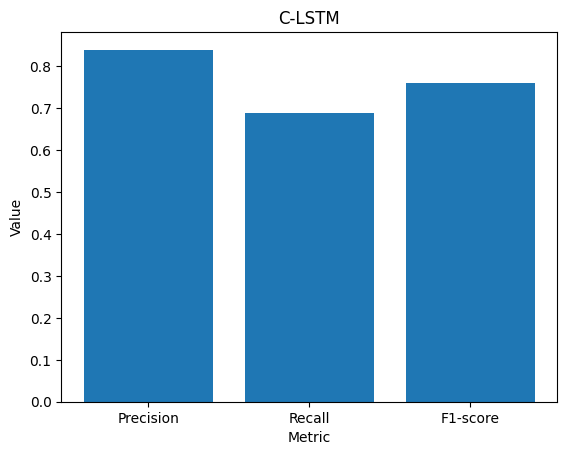

In [17]:

metrics = ['Precision', 'Recall', 'F1-score']
values = [0.84, 0.69, 0.76]
plt.bar(metrics, values)
plt.title('C-LSTM')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

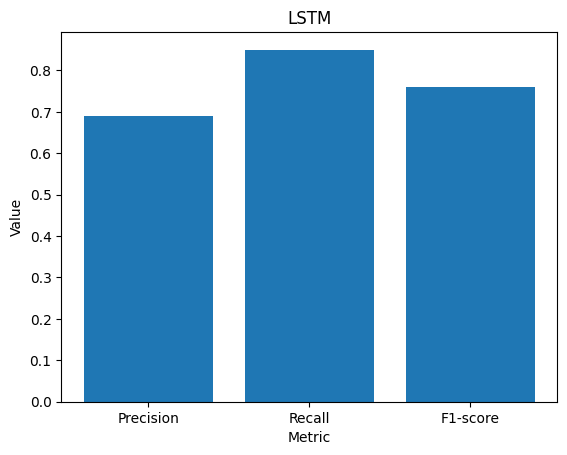

In [18]:

metrics = ['Precision', 'Recall', 'F1-score']
values = [0.69, 0.85, 0.76]
plt.bar(metrics, values)
plt.title('LSTM')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

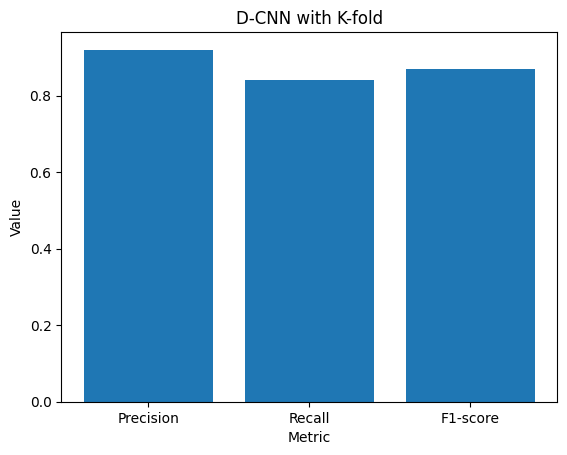

In [19]:
metrics = ['Precision', 'Recall', 'F1-score']
values = [0.92, 0.84, 0.87]
plt.bar(metrics, values)
plt.title('D-CNN with K-fold')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.show()

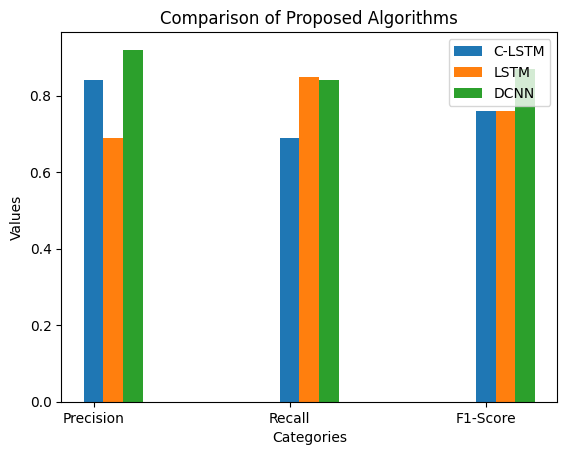

In [20]:
categories = ['Precision', 'Recall', 'F1-Score']
values1 = [0.84, 0.69, 0.76] 
values2 = [0.69, 0.85, 0.76] 
values3 = [0.92, 0.84, 0.87]

bar_width = 0.1


x = range(len(categories))

plt.bar(x, values1, width=bar_width, label='C-LSTM')
plt.bar([i + bar_width for i in x], values2, width=bar_width, label='LSTM')
plt.bar([i + 2*bar_width for i in x], values3, width=bar_width, label='DCNN')

plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Comparison of Proposed Algorithms')
plt.xticks(x, categories)
plt.legend()

plt.show()

In [21]:
def LSTM():
   
    a=entry1.get()
    if(a==""):
        messagebox.showinfo("WARNING","Enter some Input")
    elif(a.isdigit()):
        messagebox.showinfo("MSGTYPE ERROR","Enter a proper Input")
    elif(not (a.replace(' ','').isalnum())):
        messagebox.showinfo("ERROR","Invalid Input")    
    else:    
        a=newdf(entry1.get())
        b=newpad(a)
        b = np.expand_dims(b, axis=0)
        test_predictions = (best_model.predict(b) > 0.5).astype(int)
        if(test_predictions==1):
            messagebox.showinfo("Detected Speech","Hate Speech Detected:1")
        else:
            messagebox.showinfo("Detected Speech","Non-Hate Speech Detected:0")
        
        print(test_predictions)

In [22]:
def LSTM2():
    a=entry1.get()
    if(a==""):
        messagebox.showinfo("WARNING","Enter some Input")
    elif(a.isdigit()):
        messagebox.showinfo("MSGTYPE ERROR","Enter a proper Input")
    elif(not (a.replace(' ','').isalnum())):
        messagebox.showinfo("ERROR","Invalid Input")
    else:    
        a=newdf(entry1.get())
        b=newpad2(a)
        b = np.expand_dims(b, axis=0)
        test_predictions = (best_model2.predict(b) > 0.5).astype(int)
        if(test_predictions==1):
            messagebox.showinfo("Detected Speech","Hate Speech Detected:1")
        else:
            messagebox.showinfo("Detected Speech","Non-Hate Speech Detected:0")
    
        print(test_predictions)

In [23]:
def DCNN():
   
    a=entry1.get()
    if(a==""):
        messagebox.showinfo("WARNING","Enter some Input")
    elif(a.isdigit()):
        messagebox.showinfo("MSGTYPE ERROR","Enter a proper Input")
    elif(not (a.replace(' ','').isalnum())):
        messagebox.showinfo("ERROR","Invalid Input")
    else:    
        a=newdf(entry1.get())
        b=newpad(a)
        b = np.expand_dims(b, axis=0)

        test_predictions = (best_model3.predict(b) > 0.5).astype(int)
        if(test_predictions==1):
            messagebox.showinfo("Detected Speech","Hate Speech Detected:1")
        else:
            messagebox.showinfo("Detected Speech","Non-Hate Speech Detected:0")
            
            print(test_predictions)

In [24]:
def DCNN2():
    a=entry1.get()
    if(a==""):
        messagebox.showinfo("WARNING","Enter some Input")
    elif(a.isdigit()):
        messagebox.showinfo("MSGTYPE ERROR","Enter a proper Input")
    elif(not (a.replace(' ','').isalnum())):
        messagebox.showinfo("ERROR","Invalid Input")
    else:    
        a=newdf(entry1.get())
        b=newpad2(a)
        b = np.expand_dims(b, axis=0)
        test_predictions = (best_model4.predict(b) > 0.25).astype(int)
        if(test_predictions==1):
            messagebox.showinfo("Detected Speech","Hate Speech Detected:1")
        else:
            messagebox.showinfo("Detected Speech","Non-Hate Speech Detected:0")
        print(test_predictions)

In [25]:
#GUI
customtkinter.set_appearance_mode("dark")
customtkinter.set_default_color_theme("green")

root=customtkinter.CTk()
root.geometry("1024x760")

frame=customtkinter.CTkFrame(master=root)
frame.pack(pady=20,padx=60,fill="both",expand=True)

label=customtkinter.CTkLabel(master=frame, text="Hate speech detection")
label.pack(pady=12, padx=10)
 
                                 
entry1 = customtkinter.CTkEntry(master=frame,placeholder_text= "Data Entry")
entry1.pack(pady=12, padx=10)

button1 = customtkinter.CTkButton(master=frame,text="LSTM for Dataset1",command = LSTM)
button1.pack(pady=12, padx=10)

button2 = customtkinter.CTkButton(master=frame,text="DCNN for Dataset1",command = DCNN)
button2.pack(pady=12,padx=10)

button3=customtkinter.CTkButton(master=frame,text="LSTM for Dataset2",command = LSTM2 )
button3.pack(pady=14,padx=12)

button4=customtkinter.CTkButton(master=frame,text="DCNN for Dataset2",command = DCNN2)
button4.pack(pady=14,padx=12)

root.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
[[0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
[[0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
[[1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[1]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[[1]]
